In [1]:
import nltk
nltk.download()

C:\Users\Hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
# Natural Language Processing (NLP)  - is unsupervised learning where primary data is text data.
# Text data or object or String or Character data is non numeric whic is extracted from web-pages, word ducuments, pdf file,
# Social networking sites, images, speech, etc.

# NLP is used for Text Mining and Analysis, Speech Translation, Voice to Text, Chat Bots, Auto Filling, Text Suggestions, etc.

# Biggest Challenge is Preprocessing of text like cleaning punctuations, special characters, white spaces, html links, emojis.

# Text preprocessing has a direct effect on the Model building and performance.

# Web Scrapping - Scrapping text content from webpages, html links, etc.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [4]:
# webscraping 
import requests
from bs4 import BeautifulSoup

In [28]:
wiki = requests.get('https://en.wikipedia.org/wiki/COVID-19')

In [29]:
covid19 = BeautifulSoup(wiki.content, 'lxml') # lxml - html format used by wikipedia.

In [31]:
covid19 = covid19.getText(strip=True) # Strip is used for remove the images from web.

In [32]:
covid19

'COVID-19 - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonateContributeHelpLearn to editCommunity portalRecent changesUpload fileLanguagesLanguage links are at the top of the page across from the title.SearchSearchCreate accountLog inPersonal toolsCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1Nomenclature2Symptoms and signsToggle Symptoms and signs subsection2.1Complications3CauseToggle Cause subsection3.1Transmission3.2Virology3.3SARS-CoV-2 variants4PathophysiologyToggle Pathophysiology subsection4.1Respiratory tract4.2Nervous system4.3Gastrointestinal tract4.4Cardiovascular system4.5Other organs4.6Immunopathology4.7Viral and host factors4.7.1Virus proteins4.7.2Host factors4.8Host cytokine response4.9Pregnancy response5DiagnosisToggle Diagnosis subsection5.1Viral testing5.2Imaging5.3Coding5.4Pathology6PreventionToggle Preventio

In [9]:
# Text preprocessing
# 1) Removing punctuations, special characters, text in []or(),digits, emojis, html links, stop words(a, an, the, is, they, etc)

# 2) Convert text to lower case

# 3) Normalization of text or words - Lemmitization or Stemming
# ex: wanted,wants,wanting - root word is want. 

# 4) Lexicons are predefined list of words that are used for comparision like identifying grammer, sentiment, etc.

In [10]:
# Regular Expression or Regex are used in text processing
import re

In [33]:
covid19 = re.sub(r'\[\d+\]', '',covid19)
# re.sub()  - pattern substitution
# replace [digits] with space

In [12]:
covid

'COVID-19 - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonateContributeHelpLearn to editCommunity portalRecent changesUpload fileLanguagesLanguage links are at the top of the page across from the title.SearchSearchCreate accountLog inPersonal toolsCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1Nomenclature2Symptoms and signsToggle Symptoms and signs subsection2.1Complications3CauseToggle Cause subsection3.1Transmission3.2Virology3.3SARS-CoV-2 variants4PathophysiologyToggle Pathophysiology subsection4.1Respiratory tract4.2Nervous system4.3Gastrointestinal tract4.4Cardiovascular system4.5Other organs4.6Immunopathology4.7Viral and host factors4.7.1Virus proteins4.7.2Host factors4.8Host cytokine response4.9Pregnancy response5DiagnosisToggle Diagnosis subsection5.1Viral testing5.2Imaging5.3Coding5.4Pathology6PreventionToggle Preventio

In [41]:
covid19 = re.sub(r'\(\w+\)', '', covid19) # replace words in () with spaces

In [35]:
covid19 = re.sub(r'\(\d+\)', '', covid19) # replace digits in () with space

In [36]:
covid19 = re.sub(r'\(\W+\)', '', covid19) # replace WORDS in () with space

In [37]:
covid19 = re.sub('[0-9]+', '', covid19)   # replcae digits with space

In [17]:
# covid = re.sub(r'[^\w\s]', ' ', covid)

In [42]:
covid19

'COVID- - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonateContributeHelpLearn to editCommunity portalRecent changesUpload fileLanguagesLanguage links are at the top of the page across from the title.SearchSearchCreate accountLog inPersonal toolsCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhideNomenclatureSymptoms and signsToggle Symptoms and signs subsection.ComplicationsCauseToggle Cause subsection.Transmission.Virology.SARS-CoV- variantsPathophysiologyToggle Pathophysiology subsection.Respiratory tract.Nervous system.Gastrointestinal tract.Cardiovascular system.Other organs.Immunopathology.Viral and host factors..Virus proteins..Host factors.Host cytokine response.Pregnancy responseDiagnosisToggle Diagnosis subsection.Viral testing.Imaging.Coding.PathologyPreventionToggle Prevention subsection.Vaccine.Face masks and respiratory hygien

In [39]:
# Tokenization - Breaking content into tokens. Tokens can be either words or sentences.

# Sentence Tokenization - Breaking content into sentence with delimiter fullstop. sentence tokenization is preferred in 
# Sentence tokenization is preferred in Sentiment analysis 

# Word Tokenization - Breaking content into words with delimiter space used for text analysis.

In [43]:
from nltk.tokenize import sent_tokenize

In [44]:
covid_sentences = sent_tokenize(covid19)

In [45]:
len(covid_sentences)

1302

In [46]:
type(covid_sentences)

list

In [49]:
covid_sentences = [re.sub(r'[^\w\s]', '', x) for x in covid_sentences]

In [50]:
covid_sentences

['COVID  WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonateContributeHelpLearn to editCommunity portalRecent changesUpload fileLanguagesLanguage links are at the top of the page across from the titleSearchSearchCreate accountLog inPersonal toolsCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhideNomenclatureSymptoms and signsToggle Symptoms and signs subsectionComplicationsCauseToggle Cause subsectionTransmissionVirologySARSCoV variantsPathophysiologyToggle Pathophysiology subsectionRespiratory tractNervous systemGastrointestinal tractCardiovascular systemOther organsImmunopathologyViral and host factorsVirus proteinsHost factorsHost cytokine responsePregnancy responseDiagnosisToggle Diagnosis subsectionViral testingImagingCodingPathologyPreventionToggle Prevention subsectionVaccineFace masks and respiratory hygieneIndoor ventilation and avo

In [51]:
# Text blos based Sentiment Analysis - Generates 2 metrics

# Polarity Score is a float between -1 to 1 and is calculated based on positive/negative words by comparing with respective
# lexicons of positive/negative/neutral words list

# Subjectivity score is between 0 and 1. Closer to 1 indicates high personal opinion without factual informationo and closer to 
# 0 indicate low personal opinion with factual information.

In [52]:
from textblob import TextBlob

In [54]:
s1 = TextBlob("Tendulkar is greatest batsman in Cricket")

In [55]:
s1.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [56]:
s2 = TextBlob("Tendulkar scored 25000 runs and greate batsman in world")

In [57]:
s2.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [58]:
s3 = TextBlob("Tendulkar is not a great bowler")

In [59]:
s3.sentiment

Sentiment(polarity=-0.4, subjectivity=0.75)

In [60]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [61]:
covid_sentences = pd.DataFrame(covid_sentences)

In [62]:
covid_sentences.columns = ['sentences']

In [63]:
covid_sentences['sentiment'] = [str(analyze_sentiment(x))
                               for x in covid_sentences.sentences]

In [64]:
covid_sentences.sentiment.value_counts()

Neutral     971
Positive    253
Negative     78
Name: sentiment, dtype: int64

In [65]:
from nltk.tokenize import word_tokenize

In [66]:
covid_words = word_tokenize(covid19)

In [67]:
covid_words = [w for w in covid_words if w.isalnum()]

In [71]:
covid_words

['WikipediaJump',
 'to',
 'contentMain',
 'menuMain',
 'menumove',
 'to',
 'sidebarhideNavigationMain',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usDonateContributeHelpLearn',
 'to',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileLanguagesLanguage',
 'links',
 'are',
 'at',
 'the',
 'top',
 'of',
 'the',
 'page',
 'across',
 'from',
 'the',
 'accountLog',
 'inPersonal',
 'toolsCreate',
 'accountLog',
 'inPages',
 'for',
 'logged',
 'out',
 'editorslearn',
 'moreContributionsTalkContentsmove',
 'to',
 'sidebarhideNomenclatureSymptoms',
 'and',
 'signsToggle',
 'Symptoms',
 'and',
 'signs',
 'Cause',
 'variantsPathophysiologyToggle',
 'Pathophysiology',
 'and',
 'host',
 'factors',
 'Virus',
 'proteins',
 'Host',
 'cytokine',
 'responseDiagnosisToggle',
 'Diagnosis',
 'Prevention',
 'masks',
 'and',
 'respiratory',
 'ventilation',
 'and',
 'avoiding',
 'crowded',
 'indoor',
 'and',
 'control',
 'measuresTreatmentPrognosis',
 'and',
 'ris

In [72]:
from nltk.corpus import stopwords

In [73]:
stop_words = set(stopwords.words("english"))

In [74]:
covid_words = [w for w in covid_words if not str.lower(w) in stop_words]

In [75]:
covid_words

['WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhideNavigationMain',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usDonateContributeHelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileLanguagesLanguage',
 'links',
 'top',
 'page',
 'across',
 'accountLog',
 'inPersonal',
 'toolsCreate',
 'accountLog',
 'inPages',
 'logged',
 'editorslearn',
 'moreContributionsTalkContentsmove',
 'sidebarhideNomenclatureSymptoms',
 'signsToggle',
 'Symptoms',
 'signs',
 'Cause',
 'variantsPathophysiologyToggle',
 'Pathophysiology',
 'host',
 'factors',
 'Virus',
 'proteins',
 'Host',
 'cytokine',
 'responseDiagnosisToggle',
 'Diagnosis',
 'Prevention',
 'masks',
 'respiratory',
 'ventilation',
 'avoiding',
 'crowded',
 'indoor',
 'control',
 'measuresTreatmentPrognosis',
 'risk',
 'factorsToggle',
 'Prognosis',
 'risk',
 'factors',
 'risk',
 'Mortality',
 'fatality',
 'fatality',
 'rate',
 'Estimates',
 'Earlier',
 'estimates',


In [76]:
covid_words = [w.lower() for w in covid_words] # it converted into small 

In [77]:
covid_words

['wikipediajump',
 'contentmain',
 'menumain',
 'menumove',
 'sidebarhidenavigationmain',
 'pagecontentscurrent',
 'eventsrandom',
 'articleabout',
 'wikipediacontact',
 'usdonatecontributehelplearn',
 'editcommunity',
 'portalrecent',
 'changesupload',
 'filelanguageslanguage',
 'links',
 'top',
 'page',
 'across',
 'accountlog',
 'inpersonal',
 'toolscreate',
 'accountlog',
 'inpages',
 'logged',
 'editorslearn',
 'morecontributionstalkcontentsmove',
 'sidebarhidenomenclaturesymptoms',
 'signstoggle',
 'symptoms',
 'signs',
 'cause',
 'variantspathophysiologytoggle',
 'pathophysiology',
 'host',
 'factors',
 'virus',
 'proteins',
 'host',
 'cytokine',
 'responsediagnosistoggle',
 'diagnosis',
 'prevention',
 'masks',
 'respiratory',
 'ventilation',
 'avoiding',
 'crowded',
 'indoor',
 'control',
 'measurestreatmentprognosis',
 'risk',
 'factorstoggle',
 'prognosis',
 'risk',
 'factors',
 'risk',
 'mortality',
 'fatality',
 'fatality',
 'rate',
 'estimates',
 'earlier',
 'estimates',


In [78]:
covid_words = [w for w in covid_words if len(w) > 2]

In [79]:
covid_words

['wikipediajump',
 'contentmain',
 'menumain',
 'menumove',
 'sidebarhidenavigationmain',
 'pagecontentscurrent',
 'eventsrandom',
 'articleabout',
 'wikipediacontact',
 'usdonatecontributehelplearn',
 'editcommunity',
 'portalrecent',
 'changesupload',
 'filelanguageslanguage',
 'links',
 'top',
 'page',
 'across',
 'accountlog',
 'inpersonal',
 'toolscreate',
 'accountlog',
 'inpages',
 'logged',
 'editorslearn',
 'morecontributionstalkcontentsmove',
 'sidebarhidenomenclaturesymptoms',
 'signstoggle',
 'symptoms',
 'signs',
 'cause',
 'variantspathophysiologytoggle',
 'pathophysiology',
 'host',
 'factors',
 'virus',
 'proteins',
 'host',
 'cytokine',
 'responsediagnosistoggle',
 'diagnosis',
 'prevention',
 'masks',
 'respiratory',
 'ventilation',
 'avoiding',
 'crowded',
 'indoor',
 'control',
 'measurestreatmentprognosis',
 'risk',
 'factorstoggle',
 'prognosis',
 'risk',
 'factors',
 'risk',
 'mortality',
 'fatality',
 'fatality',
 'rate',
 'estimates',
 'earlier',
 'estimates',


In [80]:
from nltk.probability import FreqDist

In [81]:
wordfreq = FreqDist(covid_words)

In [82]:
wordfreq.most_common(50)

[('retrieved', 202),
 ('disease', 164),
 ('coronavirus', 156),
 ('may', 121),
 ('health', 106),
 ('february', 84),
 ('virus', 81),
 ('control', 81),
 ('people', 81),
 ('prevention', 73),
 ('march', 66),
 ('respiratory', 65),
 ('april', 65),
 ('patients', 62),
 ('infection', 61),
 ('review', 59),
 ('original', 58),
 ('risk', 57),
 ('june', 56),
 ('symptoms', 53),
 ('transmission', 53),
 ('december', 51),
 ('severe', 49),
 ('cases', 47),
 ('treatment', 47),
 ('clinical', 46),
 ('september', 46),
 ('pandemic', 45),
 ('new', 45),
 ('china', 44),
 ('july', 44),
 ('journal', 44),
 ('january', 43),
 ('november', 42),
 ('october', 42),
 ('also', 40),
 ('covid', 37),
 ('use', 37),
 ('medicine', 37),
 ('wuhan', 35),
 ('infected', 33),
 ('systematic', 33),
 ('syndrome', 32),
 ('organization', 32),
 ('spread', 31),
 ('novel', 31),
 ('august', 30),
 ('diseases', 29),
 ('mortality', 28),
 ('first', 28)]

In [83]:
from wordcloud import WordCloud

In [84]:
covidwords = (" ").join(covid_words)

In [85]:
wordcloud = WordCloud(width = 1000, height=500).generate(covidwords)


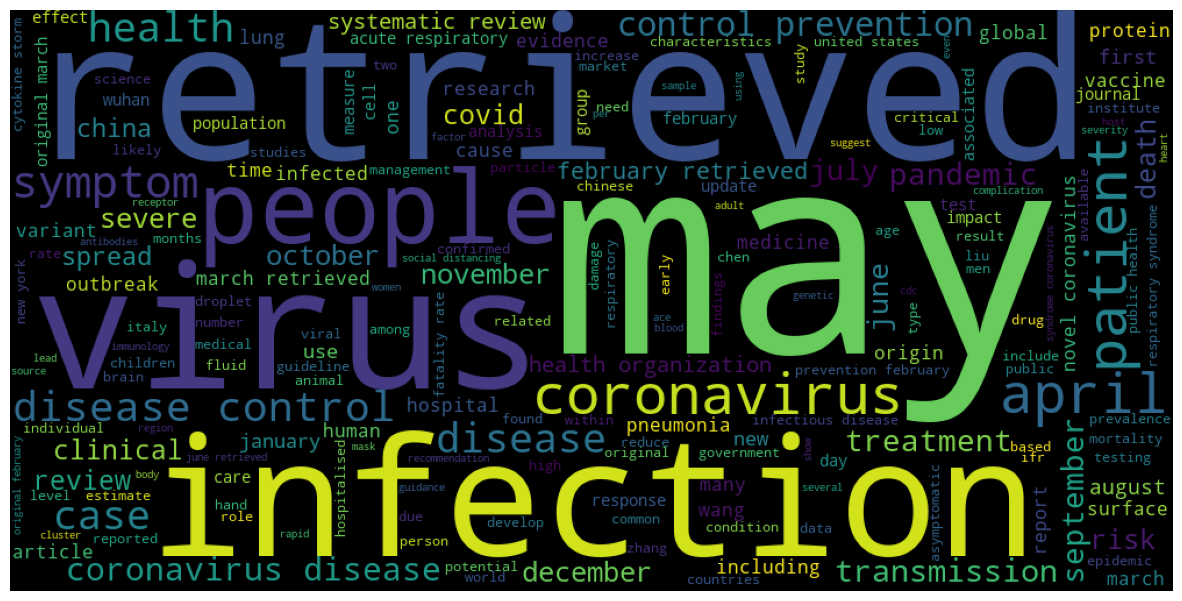

In [87]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [88]:
# Post Text preprocessing: Text data must be converted into numbers for Machine Learning or Deep Learning Algorithms.

# Post Preprocessing and wordtokenizing data will be i the form of words or tokens or terms.

# 3 matrices can be created using the corpus of words.
# 1) Document/Sentence/Tweet Term Matrix[DTM] - Terms or words or Tokens will be in columns and Document/Sentence/Tweet in Rows.
# 2) Term Document/Sentence/Tweet Matrix[TDM] - Terms or words or Tokens will be in Rows and Document/Sentence/Tweet in columns.
# 3) Term Frequency Inverse Document Frequency[TFIDF] Matrix - Probability is calculated based on terms or words and Documents/Sentences.

# All 3 matrices are sparse matrices (many zeros in matrix)
# from sklearn.feature_extraction.text import CountVectorizer is default Document Term Matrix.

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
DTM = CountVectorizer(max_features=200)

In [91]:
X = DTM.fit_transform(covid_words) # Document Term Matrix

In [94]:
X.shape

(14025, 200)

In [102]:
X_DTM = pd.DataFrame(X.toarray(),columns=DTM.vocabulary_)

In [103]:
X_TDM = X_DTM.T # Term Document Matrix

In [104]:
X_TDM.head()

,0,1,2,3,4,5,6,7,8,9,...,14015,14016,14017,14018,14019,14020,14021,14022,14023,14024
symptoms,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cause,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
host,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
factors,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
virus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
# Term Frequency Inverse Document Frequency Matrix - TFIDF Matrix

# TFIDF uses probability calculations

# The car is driven on the road.
# The truck is driven on the highway.

# Post Preprocessing
# s1 - car, driven, road
# s2 - truck driven , highway

# TFIDF for car
# Term Frequency of Car - 1/3 = 0.33
# Inverse Document Frequency of Car = log(2/1) = log(2) = 0.6931
# TFIDF of Car = 0.33 * 0.6931 = 0.2287

# TFIDF for Driven
# Term Frequency of Driven